Author: Eli Miranda

Date: 03/24/2024

Email: mr.miranda93@yahoo.com 

Unit 2 Deliverable 1 - Statistics & Public Health 1: Cleaning and EDA

__________________________________________________________________________________________________________________________________________

Requirements: Please submit your Jupyter notebook which should include commented code and markdown cells explaining your methodology and findings.

## Table of Contents

Introduction

[Part 1 - Basic Data Wrangling](#part-1)

    1) What is the shape of the dataframe?   

    2) Convert the 'Date' column to have a datetime format.    

    3) Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

    4) Are there any columns that contain duplicate information? If so, remove the redundant column.

    5) Are there any null values in the dataframe? If so, deal with them appropriately.

[Part 2 - Basic EDA](#part-2)

    1) Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

[Part 3 - Advanced EDA](#part-3)

    1) Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.
    
    2) Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.
    
    3) Using an appropriate visual, come up with an additional insight of your choice.

Conclusion

__________________________________________________________________________________________________________________________________________

## Introduction

There are public health concerns regarding the spread of West Niel Virus (WNV), which is a disease carried by infected mosquitos that is transmitted to people the mosquito bites. The WNV data we we will be using in this investigation is sourced from Chicago, IL between 2008 & 2019, where a series of traps were place throughout the city to capture mosquito specimens, who were then studied to determine if they are carriers of WVN. Monitoring the distribution of WVN carrier mosquitos accross the traps in the city will yield insights into the spread of WVN in the city. 


__________________________________________________________________________________________________________________________________________

Before diving into addressing any questions regarding WNV, we must first wrangle (clean up) the data, after which, we will conduct Exploraty Data Analysis (EDA).

In [1]:
# Importing data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
# Initializing dataframe
df_mosquito = pd.read_csv('mosquito_data.csv')

## Part 1 - Basic Data Wrangling <a class="anchor" id="part-1"></a>

### 1. What is the shape of the dataframe?

In [3]:
# Print the shape of the dataframe. 
df_mosquito.shape

(18495, 13)

This dataframe consists of 13 columns and 18495 rows. 

In [4]:
# Display the DataFrame df_mosquito, first five row & last five rows of the dataframe are printed. 
display(df_mosquito)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758


Exploring the header in each column and the values in each row to understand their what they represent. 

The dataframe shape is also shown. 


### 2. Convert the 'Date' column to have a datetime format.

In order to convert the dtype of any column we must first identify what dtype the column(s) currently has. 

In [5]:
# Display information about the DataFrame df_mosquito
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


Based on the df information displayed above we can see that the 'Date' column has the object dtype.

In [6]:
# Convert column from object dtype to datetime dtype. 
df_mosquito['Date'] = pd.to_datetime(df_mosquito['Date'])

Now we have converted the dtype for the 'Date' column to datetime. 

In [7]:
# Display information about the DataFrame df_mosquito 
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


By reviewing the df information again we can do sense check to confirm the the 'Date' column was changed from the object dtype to the<br> 
to datetime dtype format. 

### 3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

In [8]:
# Print info for all columns to determine dtypes.
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


Based on the information displayed above we can determine the follwowing: 

Two numeric columns are 'Week' and 'Mosquito number'. Both of these columns are storing int64 dtype.

Two categorical columns are 'Trap type' and 'Species'. Both of these columns are storing object dtype.

In [9]:
# Print the desctiption of the numereical columns in the dataframe. 
df_mosquito.describe()

,Year,Week,Block,Date,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,2013-06-30 17:40:04.100135424,10.879913,41.839963,-87.691642
min,2007.000000,20.000000,1.000000,2007-05-29 00:05:00,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2010-07-16 00:07:00,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,2013-08-22 00:08:00,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,2016-08-11 00:08:00,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,2019-09-26 00:09:00,50.000000,42.017801,-87.531051
std,3.725857,4.332020,36.712796,NaN,13.475066,0.111374,0.076545


Here we see the summary statisics for all the numerical columns in the dataframe, including 'Week' and 'Mosquito number'.

Week: We see that the minimum amount of weeks before WNV tests were performed is 20. This is due to the onset of Summer, where mosquito presence is significant enough to test for WNV.<br> 
We also see the maximum amount of week of 40, which indidcates the onset of Fall, where mosquito presence will dip and no longer significant enough to be measureable.<br>
We see the bulk of the weeks that WNV was tested for is between weeks 28 and 34 (based on the 25%-75%), which are the peak Summer months, during which mosquito presence is expected to be at its highest. The mean is week 31.004001, which is practically the same as the median of 31. This means the distribution does not have any significant skew to the left or right. 

Mosquito number: Represents the number of mosquitos per traps. The minimum amount of mosquitos found in a trap is 1, which is an indicator that no traps were found to be empty.<br>
The maximum amount of mosquitos in a trap is 50. However, this is an artifical maximum because when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset).<br>
The mean for this column is 10.879913, which is a little over double the median of 5, which is an indicator that this columns distribution is right-skewed.<br> 
The artificial maximum may have influnced this right-skew. We will explore this further later on.

Next we will plot the 'Week' and 'Mosquito number' columns as visual confirmation of the summary statisics above. 

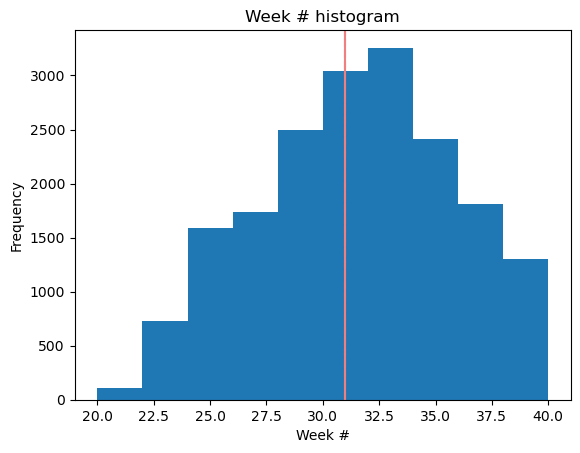

In [10]:
# Create a figure and subplot for the histogram
plt.plot()

# Plot a histogram of the "Week" column with 10 bins
plt.hist(df_mosquito['Week'], bins=10)

# Add vertical lines for the mean and median
plt.axvline(df_mosquito['Week'].mean(), color='lightcoral', label='mean')
plt.axvline(df_mosquito['Week'].median(), color='lightcoral', linestyle='--', label='median')

# Set the title, x-axis label, and y-axis label
plt.xlabel('Week #')
plt.ylabel('Frequency')
plt.title('Week # histogram')

plt.show()

The mean and median are almost overlapping entirely on week 31, just like we see in the description above.<br> 
However, upon visual inspection we do see a slight left-skew distribution. As mentioned prior, the summer months or weeks 28-34 is<br>
we would expect to see the highest amount of mosquitos, which is confirmed by the three highest frequency bars in the plot above. The<br>
frequencies are 2500, 3000 and ~3500.

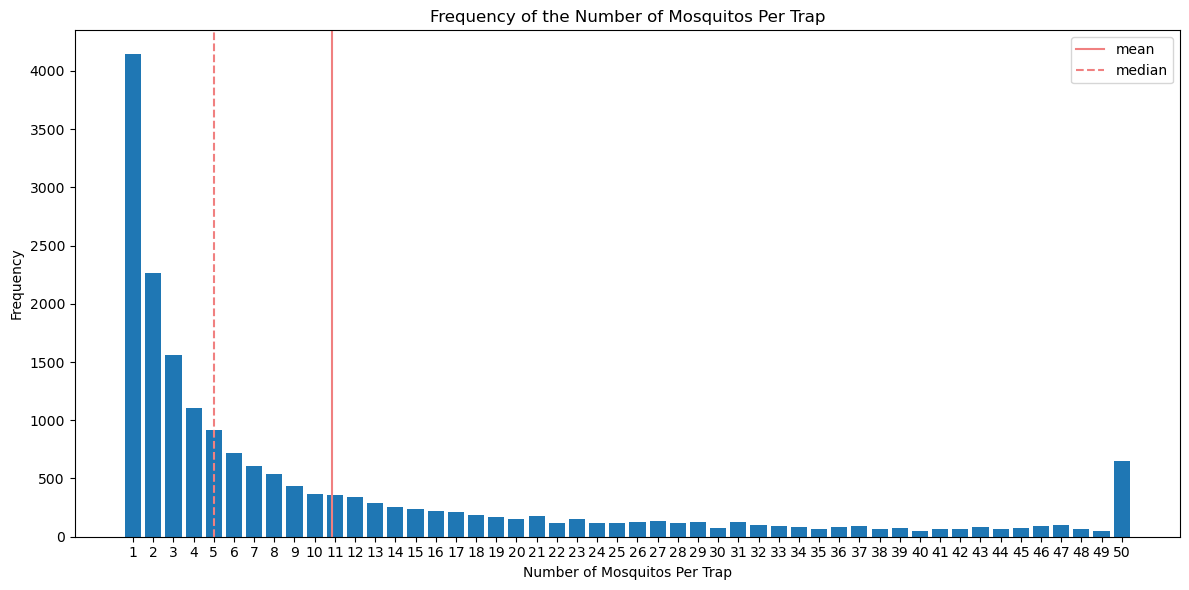

In [11]:
# Get the sorted value counts of "Mosquito number" and sort by index
sorted_df = df_mosquito['Mosquito number'].value_counts().sort_index() 

# Set the width to 12 inches and height to 6 inches
plt.figure(figsize=(12, 6))  

# Create a bar plot of the sorted value counts
plt.bar(sorted_df.index, sorted_df.values) #

# Add vertical lines for the mean and median
plt.axvline(df_mosquito['Mosquito number'].mean(), color='lightcoral', label='mean')
plt.axvline(df_mosquito['Mosquito number'].median(), color='lightcoral', linestyle='--', label='median')

# Set the title, x-axis label, y-axis label, and x-axis ticks
plt.title('Frequency of the Number of Mosquitos Per Trap')
plt.xlabel('Number of Mosquitos Per Trap')
plt.ylabel('Frequency')
plt.xticks(sorted_df.index)

# Makes sure there is no overlap in plots
plt.tight_layout()

plt.legend()
plt.show()

As expected, we see a right-skewed distribution, which is supported by our mean being higher than our median.<br> 
Additionally, we can see that the frequnecy of traps containing one, two, three, four and five mosquitos is what pulled the median to the left.<br>
Moreover, traps with 50 mosquitos appears to be an outlier, which is expected since their frequency is artificially inflated by the act of splitting<br>
the count of mosquitos between 2 or more records (rows in the dataset) when their count per trap exceeds 50. 

Next we will explore the two categorical columns are 'Trap type' and 'Species'. 

In [12]:
# Count the number of unique values in the 'Trap' column for each 'Trap type' group
df_mosquito.groupby('Trap type')['Trap'].nunique()

Trap type
CDC          28
GRAVID      165
OVI           1
SENTINEL     12
Name: Trap, dtype: int64

Here we see the count or distrubution of each Trap type. 

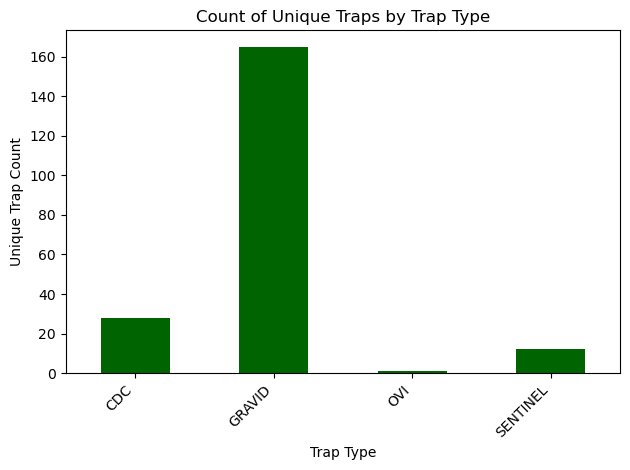

In [13]:
# Group by 'Trap type' and count unique 'Trap' values
trap_counts = df_mosquito.groupby('Trap type')['Trap'].nunique()

# Plotting the bar chart
trap_counts.plot(kind='bar', color='darkgreen')
plt.xlabel('Trap Type')
plt.ylabel('Unique Trap Count')
plt.title('Count of Unique Traps by Trap Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure no overlap in plots

plt.show()

Here we see the count or distrubution of each Trap type as visual. As we see in the numerical table, the <br>
GRAVID Trap type is the most common trap used (165) in this study. CDC (28) is second most used, followed up SENTINEL (12) and <br>
then there was only one OVI tyrap used for this study. 

In [14]:
# Group the data by 'Trap type' and count the number of unique values in the 'Mosquito number' column within each group
df_mosquito['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

Here we see the counts or distrubution of the number of mosquitos caught in each Trap type. 


In [15]:
# Group the data by 'Species' and count the number of unique values in the 'Mosquito number' column within each group
df_mosquito['Species'].value_counts()

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64

Here we see the counts or distrubution of the number of mosquitos for each species. 

Next we will plot these distrubution of the number of mosquitos for each species as <br>
well as for each trap type.

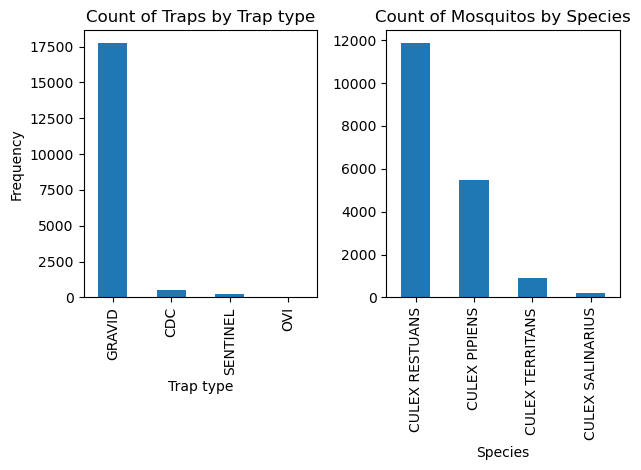

In [16]:
# Create a figure with two subplots arranged in a 1x2 grid (one row, two columns)
plt.subplots(1, 2)  #

# Left subplot (Slot 1 in the 1x2 grid)
plt.subplot(1, 2, 1)  
df_mosquito['Trap type'].value_counts().plot(kind='bar') # Plot a bar plot of Trap type counts
plt.xlabel('Trap type')
plt.ylabel('Frequency')
plt.title('Count of Traps by Trap type')

# Right subplot (Slot 2 in the 1x2 grid)
plt.subplot(1, 2, 2)  
df_mosquito['Species'].value_counts().plot(kind='bar') # Plot a bar plot of Mosquito species counts
plt.title('Count of Mosquitos by Species')

# Makes sure there is no overlap in plots
plt.tight_layout()  
plt.show()

Based on the bar plots above we can see both columns are similar in that they each have four unique values on the x-axis. 

Trap type: Among the four 'Trap types', GRAVID appears to have caught the most mosquitos (17,441). However, this is likely <br>
due to this Trap type being the most used in this study. As expected, the CDC (544), SENTINEL (209) and OVI (1) Trap types <br>
caught less mosquitos than the GRAVID Trap type. Moveover, the amount of mosquitos caught in CDC, SENTINEL and OVI follows <br>
the other order of the count of each Trap type. 

Species: Among the four 'Species', CULEX RESTUANS appear to be the most prevalent mosquito caught in this study (118660). <br>
We see CULEX PIPIENS at 5486, CULEX TERRITANS at 917 and CULEX SALINARIUS at 226. We will explore the relationship between <br>
'Trap type' and 'Species' later on. 

### 4. Are there any columns that contain duplicate information? If so, remove the redundant columns.


In [17]:
# Using transpose to swap columns with rows and then apply .duplicated() function to see if there is any duplicate data. 
df_mosquito.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

No duplicate data could be found based on the function above. 

So we will do visual inspection of the columns and determine if any columns have may be redunant.

In [18]:
# Print the shape, firt five row &* last fivee rows of the dataframe. 
display(df_mosquito)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758


'Mosquito ID' and 'Species' appear to carry data that serve the same purpose, which is identify each mosquito. Both are also categorical data columns, which  makes the likelihood of redundancy higher. 

It could be a coincidence, but it looks like each 'Mosquito ID' seems to be the first three letters of the second half of the mosquito species name in the same row. 

In [19]:
# Print all unique values in Species column.
df_mosquito['Species'].unique()

array(['CULEX RESTUANS', 'CULEX TERRITANS', 'CULEX SALINARIUS',
       'CULEX PIPIENS'], dtype=object)

In [20]:
# Print all unique values in Mosquito ID column.
df_mosquito['Mosquito ID'].unique()

array(['Res', 'Ter', 'Sal', 'Pip'], dtype=object)

Both the 'Species' Column and the 'Mosquito ID' column has the same amount of unique values. 

Next we will see the number all possible combinations both column values in a row for this data set. 

If for in a row, we see for a value in the 'Species' column we consistantly see the same value in the 'Mosquito ID' column, it is an indicator of redundancy. 

In [21]:
# Get unique values from both columns
unique_values_col1 = df_mosquito['Species'].unique()
unique_values_col2 = df_mosquito['Mosquito ID'].unique()

# Generate all combinations of values
combinations = list(product(unique_values_col1, unique_values_col2))

# Initialize count variable
count = 0

# Iterate through combinations and check if they exist in the DataFrame
for val1, val2 in combinations:
    combination_exists = ((df_mosquito['Species'] == val1) & (df_mosquito['Mosquito ID'] == val2)).any()
    if combination_exists:
        count += 1
        print(f"Combination ({val1}, {val2}) exists in the dataset")
    else:
        print(f"Combination ({val1}, {val2}) does not exist in the dataset")

Combination (CULEX RESTUANS, Res) exists in the dataset
Combination (CULEX RESTUANS, Ter) does not exist in the dataset
Combination (CULEX RESTUANS, Sal) does not exist in the dataset
Combination (CULEX RESTUANS, Pip) does not exist in the dataset
Combination (CULEX TERRITANS, Res) does not exist in the dataset
Combination (CULEX TERRITANS, Ter) exists in the dataset
Combination (CULEX TERRITANS, Sal) does not exist in the dataset
Combination (CULEX TERRITANS, Pip) does not exist in the dataset
Combination (CULEX SALINARIUS, Res) does not exist in the dataset
Combination (CULEX SALINARIUS, Ter) does not exist in the dataset
Combination (CULEX SALINARIUS, Sal) exists in the dataset
Combination (CULEX SALINARIUS, Pip) does not exist in the dataset
Combination (CULEX PIPIENS, Res) does not exist in the dataset
Combination (CULEX PIPIENS, Ter) does not exist in the dataset
Combination (CULEX PIPIENS, Sal) does not exist in the dataset
Combination (CULEX PIPIENS, Pip) exists in the dataset


Checks how many combinations of the values for column exists. 

We see for every CULEX RESTUAN there is a Res in the same row.
We see for every CULEX TERRITANS there is a Ter in the same row. 
We see for every CULEX SALINARIUS there is a Sal in the same row. 
We see for every CULEX PIPIENS there is a Pip in the same row.

Next we will test to see if each value has the same count of mosquitos as a sense check. 

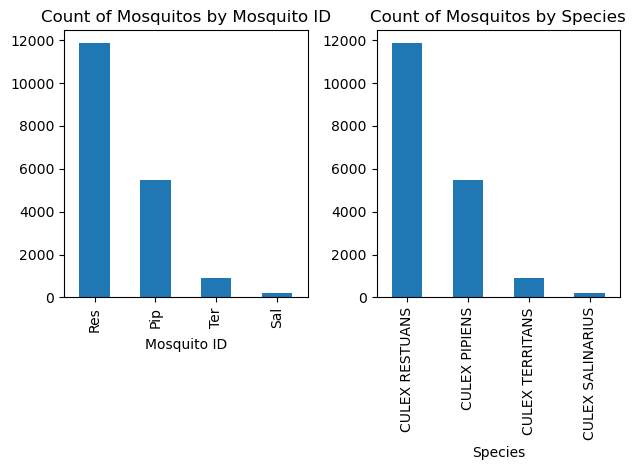

In [22]:
# Create a figure with two subplots arranged in a 1x2 grid (one row, two columns)
plt.subplots(1, 2)

# Left subplot (Slot 1 in the 1x2 grid)
plt.subplot(1, 2, 1)  
df_mosquito['Mosquito ID'].value_counts().plot(kind='bar') # Plot a bar plot of Mosquito ID counts
plt.title('Count of Mosquitos by Mosquito ID')

# Right subplot (Slot 2 in the 1x2 grid)
plt.subplot(1, 2, 2)  
df_mosquito['Species'].value_counts().plot(kind='bar') # Plot a bar plot of Species counts
plt.title('Count of Mosquitos by Species')

# Makes sure there is no overlap in plots
plt.tight_layout() 

plt.show()

The above bar charts are a sense check, if there is a 1:1 relationship between the 'Species' and 'Mosquito ID' columns, we should see the distribution<br>
of the count of mosquitos be the same for each unique value in the 'Species' column that is in the same row as each unique value in the Mosquito ID column.<br>
Ex. We see for every CULEX RESTUAN has the same mosquito count as Res. We ee this every speices with a corresponding Mosquito ID.<br>
From this we can determine that Mosquito ID is just an abbrevation of the second part of the Mosquito Species name, which makes Mosquito ID a redunant columen.<br>

'Species' and 'Mosquito ID' columns are the not only columns that are redundant. It appears the 'Address Block' and 'Block' may also be redundant. Not only do<br>
the headers for each column contain the word 'Block', but the row-value in Block (ranges from 1-3 digits in lenght), matches the first 1-3 digits of the row-value<br>
in the 'Address Block' column. This can be seen in the first 15 rows printed below. 

In [23]:
# Display the first 15 rows and selected columns
print(df_mosquito[['Address Block', 'Block']].head(15))

             Address Block  Block
0    100XX W OHARE AIRPORT    100
1        52XX S KOLMAR AVE     52
2       58XX N WESTERN AVE     58
3   39XX N SPRINGFIELD AVE     39
4      131XX S BRANDON AVE    131
5         21XX N CANNON DR     21
6      11XX W ROOSEVELT RD     11
7           22XX W 51ST ST     22
8         22XX N CANNON DR     22
9           3XX W 104TH ST      3
10        25XX W GRAND AVE     25
11      82XX S KOSTNER AVE     82
12   1XX N CENTRAL PARK DR      1
13     77XX S EBERHART AVE     77
14     77XX S EBERHART AVE     77


We will run a loop that will iterated over the rows of the dataframe. It will look for the first few characters in the row-value of 'Address Block' and cross check it<br> 
against the corresponding row-value in 'Block'. If all the row-values in 'Block' match the first few characters in the row-value of 'Address Block', then we know that<br> 
the 'Block' column is redundant.<br> 

Lets figure out the max and min amount of characters this loop should look for. Since the row-values in 'Address Block' appear in a string form with numbers coming first<br> 
followed by letters, we will use 'Block' to determine how many characters the loop should search through.

In [24]:
# Calculate and display the maximum for selected column
df_mosquito[['Block']].max()

Block    132
dtype: int64

The maximum amount of characters we will have the loop search through is three. 

In [25]:
# Initialize boolean variables to indicate matches
one_match = False
two_match = False
three_match = False

# Iterate over the rows of the DataFrame
for index, row in df_mosquito.iterrows():
    address_block = str(row['Address Block'])  # Convert to string in case it's not already
    block = str(row['Block'])  # Convert to string in case it's not already
    
    # Determine the number of digits to check based on the length of the 'Block' column value
    num_digits_to_check = len(block)
    
    # Check for matches based on the number of digits to check
    if num_digits_to_check >= 1 and address_block.startswith(block[:1]):
        one_match = True
    
    if num_digits_to_check >= 2 and address_block.startswith(block[:2]):
        two_match = True
    
    if num_digits_to_check >= 3 and address_block.startswith(block[:3]):
        three_match = True

# Print boolean values indicating matches
print(f"One match: {one_match}")
print(f"Two matches: {two_match}")
print(f"Three matches: {three_match}")

One match: True
Two matches: True
Three matches: True


Based on the matches above beging true for all three leading digit counts, we can confirm that the 'Address Block' and 'Block' are redundant. 
Between the two columns, 'Address Block' is more rich in data as it also contains the address in it, so we will drop the 'Block column'.

Since we have confirmed all the more obvious redudant columns to be 'Mosquito ID' and 'Block', we will drop now them. 

In [26]:
#Dropping columns
df_mosquito.drop(['Mosquito ID','Block'], axis=1, inplace=True)

Here we drop the 'Mosquito ID' and 'Block' columns.

In [27]:
# Display information about the  df_mosquito DataFrame 
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Trap type        18495 non-null  object        
 5   Date             18495 non-null  datetime64[ns]
 6   Mosquito number  18495 non-null  int64         
 7   WNV Present      18495 non-null  object        
 8   Species          18495 non-null  object        
 9   Lat              15571 non-null  float64       
 10  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.6+ MB


Here we do sanity/sense check to confirm the 'Mosquito ID' and 'Block columns were droppped.
We do not see the 'Mosquito ID' and 'Block columns here.

In [28]:
df_mosquito.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049


Here we do another sanity/sense check to confirm the 'Mosquito ID' and 'Block columns were droppped. <br>
We do not see the 'Mosquito ID' and 'Block columns here.

### 5. Are there any null values in the dataframe? If so, deal with them appropriately.


In [29]:
# Print the sum of null values for each column in the dataframe.
df_mosquito.isna().sum(axis=0)

Year                  0
Week                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

It appears the Lat and Lon columns are the only columns missing values. 

In [30]:
# Print the sum of null values for each column in the dataframe, but expresses them as a percent. 
100 * (df_mosquito.isna().sum(axis=0) /df_mosquito.shape[0])

Year                0.000000
Week                0.000000
Address Block       0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

Here we see that about 15.8% of the values for the Lat column is missing. This is also the case for the Lon column.<br>
Bsed on this value of 15.8% will we consider not dropping the columns at this point, but futher investigation is required.

In [31]:
# Print the desctiption of the Lat and Lon columns in the dataframe
df_mosquito[['Lat','Lon']].describe()

,Lat,Lon
count,15571.000000,15571.000000
mean,41.839963,-87.691642
std,0.111374,0.076545
min,41.644720,-87.854473
25%,41.742670,-87.747459
50%,41.845715,-87.691698
75%,41.945961,-87.637873
max,42.017801,-87.531051


Based on the summary stats above, columns Lat and Lon have very narrow range between their max and min, which means the exact,physical locations of the traps are also within a narrow range.<br> However, the testing site is very narroe in range, so the narrow range in Lat and Lon is still significant.

In [32]:
# Does Lat affect WNV presence?
df_mosquito.groupby("WNV Present")["Lat"].agg(["mean", "median"])

,mean,median
WNV Present,,
negative,41.835907,41.825398
positive,41.856167,41.883721


We see a difference between the median and mean for both postive and negative WNV mosoquitos, so the Lat does affect WNV presence at this granular level. 

In [33]:
# Does Lon affect WNV presence?
df_mosquito.groupby("WNV Present")["Lon"].agg(["mean", "median"])

,mean,median
WNV Present,,
negative,-87.686795,-87.689417
positive,-87.711005,-87.716165


Let explore the distrubtion of to Lat and Lon.

We see a difference between the median and mean for both postive and negative WNV mosoquitos, so the Lon does affect WNV presence at this level. 

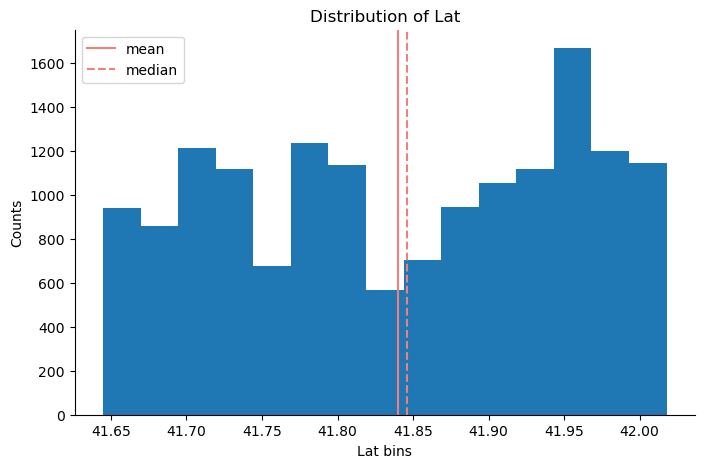

In [34]:
# Create a histogram of the "Lat" column with 15 bins
plt.figure(figsize=(8,5))
plt.hist(df_mosquito['Lat'], bins=15)

# Add vertical lines for the mean and median
plt.axvline(df_mosquito['Lat'].mean(), color='lightcoral', label='mean')
plt.axvline(df_mosquito['Lat'].median(), color='lightcoral', linestyle='--', label='median')

# Set the title and axis labels
plt.title('Distribution of Lat')
plt.ylabel('Counts')
plt.xlabel('Lat bins')
sns.despine()

plt.legend()
plt.show()

The mean and median are not identical for LAT and the distribution of count for each Lat bin does not appear to be even. 

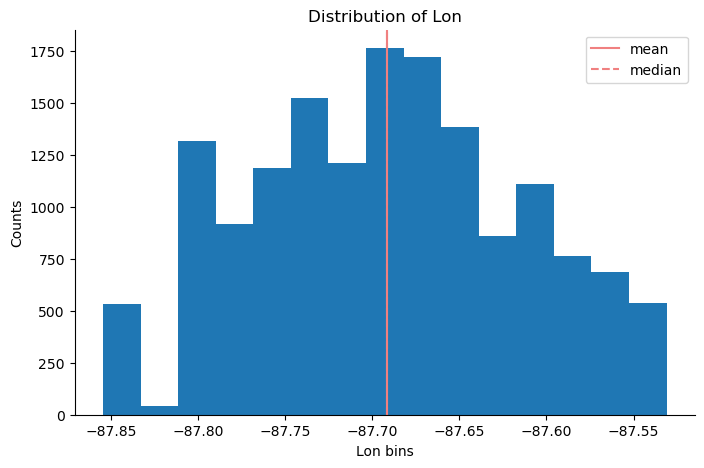

In [35]:
# Create a histogram
plt.figure(figsize=(8,5))
plt.hist(df_mosquito['Lon'], bins=15)

plt.axvline(df_mosquito['Lon'].mean(), color='lightcoral', label='mean')
plt.axvline(df_mosquito['Lon'].median(), color='lightcoral', linestyle='--', label='median')

plt.title('Distribution of Lon')
plt.ylabel('Counts')
plt.xlabel('Lon bins')
sns.despine()

plt.legend()
plt.show()

The mean and median appear to be almost identical for Lon. The distribution does not appear to be particularly skewed. However, between -87.85 and -87.80, we see<br>
a signiifcant drops in counts, which could have an impact on WNV presence, so we will resort to imputation.

We will used the 'Address Block', since it is referring to location of traps, just like the 'Lat' and 'Lon' columns do and it is common knowledge that address<br> 
correspond to a Lat and Lon.

Since there are no null/missing row-values in the 'Address Block' column and the 'Address Block' shows an exact address, we wll use the exact address to determine<br>
what Lat and Lon row-values are missing. 

First we will count all of the unique row-values in the 'Address Block' column, to generate a list of address we need to search Lats and Lons for. 

In [36]:
# Filter rows where both 'Lat' and 'Lon' columns are NaN
missing_lat_lon = df_mosquito[df_mosquito['Lat'].isna() & df_mosquito['Lon'].isna()]

# Get unique values from the 'Address Block' column in the filtered DataFrame
unique_missing_blocks = missing_lat_lon['Address Block'].unique()

# Print the unique address blocks with missing lat and lon
for block in unique_missing_blocks:
    print(block)

100XX W OHARE AIRPORT
4XX W 127TH
100XX W OHARE
81XX S ASHLAND
79XX S CHICAGO
98XX S AVENUE G
65XX N OAK PARK AVE
115XX S AVENUE L
30XX S HOYNE
43XX N ASHLAND


In [37]:
# Ditionary of address blocks
address_Lat_Lon_coor = {
'100XX W OHARE': {'Lat': 41.9767, 'Lon': -87.885},
'100XX W OHARE AIRPORT': {'Lat': 41.9962, 'Lon': -87.92611},
'115XX S AVENUE L': {'Lat': 41.87973, 'Lon': -87.68596},
'30XX S HOYNE': {'Lat': 41.88085, 'Lon': -87.67914},
'43XX N ASHLAND': {'Lat': 41.88229, 'Lon': -87.66668},
'4XX W 127TH': {'Lat': 41.66345, 'Lon': -87.625},
'65XX N OAK PARK AVE': {'Lat': 41.89465, 'Lon': -87.77807},
'79XX S CHICAGO': {'Lat': 41.52246, 'Lon': -88.08158},
'81XX S ASHLAND': {'Lat': 41.88025, 'Lon': -87.6666},
'98XX S AVENUE G': {'Lat': 41.87942, 'Lon': -87.68653}
}

Using the following website (https://www.latlong.net/), we are able to input the address above and find their corresponding Lat and Lon.<br>
Once we found fall the missing Lat and lon, we then create dictionary where all the address are keys to which the Lat and Lon we found earlier<br>
are assigned to. 

In [38]:
# Fill missing 'Lat' values based on 'Address Block' using the address_Lat_Lon_coor dictionary
df_mosquito['Lat'] = df_mosquito.apply(lambda row: address_Lat_Lon_coor.get(row['Address Block'], {}).get('Lat', row['Lat']), axis=1)

# Fill missing 'Lon' values based on 'Address Block' using the address_Lat_Lon_coor dictionary
df_mosquito['Lon'] = df_mosquito.apply(lambda row: address_Lat_Lon_coor.get(row['Address Block'], {}).get('Lon', row['Lon']), axis=1)

Here we use the dictionary to fill in all the missing/null values in the 'Lat' and 'Lon' columns.

In [39]:
df_mosquito.isna().sum(axis=0)

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

Here we are doing a sense check to confirm all the missing/null values have been replace based on the Lat and Lon row-values<br>
in the dictionary we created.

In [40]:
df_mosquito.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.996200,-87.926110
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049


__________________________________________________________________________________________________________________________________________

  
## Part 2 - Basic EDA  <a class="anchor" id="part-2"></a>


### 1. Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

In [41]:
#Count of unique dates in the Date column.
unique_dates_count = df_mosquito["Date"].nunique()
print("Number of unique dates:", unique_dates_count)

Number of unique dates: 298


Note that the Date column is being used in a categorical context when exploring the Date column's relationship with the Mosquito Number column. <br>
298 unique dates would be difficult to visualize, so we will group this column by the year portion of the date in our visual. 

In [42]:
#High level summary of the distribution of Mosquito number. 
df_mosquito["Mosquito number"].describe()

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64

Mosquito number is a numerical column. The range of 1-50 is manageable in a visualization. However, this is just the description of <br>
the distribution of mosquitos found in each trap, with an artificial cap of 50 mosquitos per trap. This will make it difficult to see <br>
the relationship between 'Mosquito number' and 'Date.' Thus, we will look at the count of total mosquitos to better analyze the distribution <br>
of mosquitos over time. 

So we will use plots that are compatible with both column data types, to explore their relationship. <br>
In this case, we will use a bar plot. 

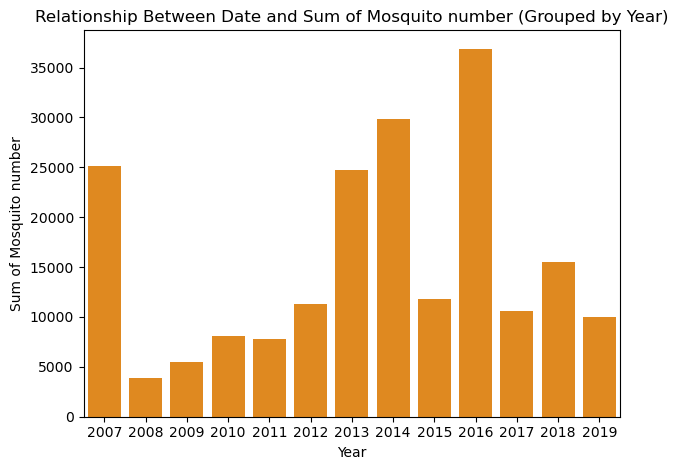

In [43]:
# Group the data by year and calculate the sum of Mosquito numbers
df_grouped = df_mosquito.groupby(df_mosquito['Date'].dt.year)['Mosquito number'].sum().reset_index()

# Create a horizontal bar plot
sns.barplot(x='Date', y='Mosquito number', data=df_grouped, color='darkorange')

# Set the title, x-axis label, and y-axis label
plt.title('Relationship Between Date and Sum of Mosquito number (Grouped by Year)')
plt.xlabel('Year')
plt.ylabel('Sum of Mosquito number')

# Makes sure there is no overlap in plots
plt.tight_layout()

plt.show()

Here we the total number of mosquitos that were captured for this study, but grouped by year. We see that the <br>
years 2007, 2013, 2014  and 2016 saw the most mosquitos trapped across the span of 2007 - 2019. At minimum we <br>
see these 4 years be anywhere from double to five times more than the other years in the range. It is unclear <br>
what the cause for these large gaps in the amount of mosquitos trapped year over year. However, it could be <br>
be related to a number climate conditions and/or certain methods in the capturing of date for this study. 

__________________________________________________________________________________________________________________________________________


## Part 3 - Advanced EDA <a class="anchor" id="part-3"></a>


### 1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

In [44]:
# Group by 'WNV Present' and calculate the sum of 'Mosquito number'
df_mosquito.groupby('WNV Present')['Mosquito number'].sum()

WNV Present
negative    115927
positive     85297
Name: Mosquito number, dtype: int64

Here we see the count of mosquitos that test positive for WNV vs negative. Based on theses sums, 73.57820007% test positive for WNV.  

In [45]:
# Group by 'Species' and 'WNV Present', then calculate the sum of 'Mosquito number'
df_mosquito.groupby(['Species', 'WNV Present'])['Mosquito number'].sum()

Species           WNV Present
CULEX PIPIENS     negative       30156
                  positive       31208
CULEX RESTUANS    negative       83562
                  positive       54024
CULEX SALINARIUS  negative         433
                  positive          31
CULEX TERRITANS   negative        1776
                  positive          34
Name: Mosquito number, dtype: int64

Here we see the distribution of WNV presence, but broken down by Species. Let's look at these values expressed as a percentages. 

In [46]:
# Calculate the sum of 'Mosquito number' grouped by 'Species' and 'WNV Present'
grouped_sum = df_mosquito.groupby(['Species', 'WNV Present'])['Mosquito number'].sum()

# Calculate the total sum of 'Mosquito number' across all groups
total_sum = grouped_sum.sum()

# Calculate the percentage of each sum
percentages = (grouped_sum / total_sum) * 100

print(percentages)

Species           WNV Present
CULEX PIPIENS     negative       14.986284
                  positive       15.509084
CULEX RESTUANS    negative       41.526856
                  positive       26.847692
CULEX SALINARIUS  negative        0.215183
                  positive        0.015406
CULEX TERRITANS   negative        0.882598
                  positive        0.016897
Name: Mosquito number, dtype: float64


Here we see the distribution of WNV presence, broken down by Species expressed as a percentages. 

Next we will visualize these values to better interpret their relationships. 

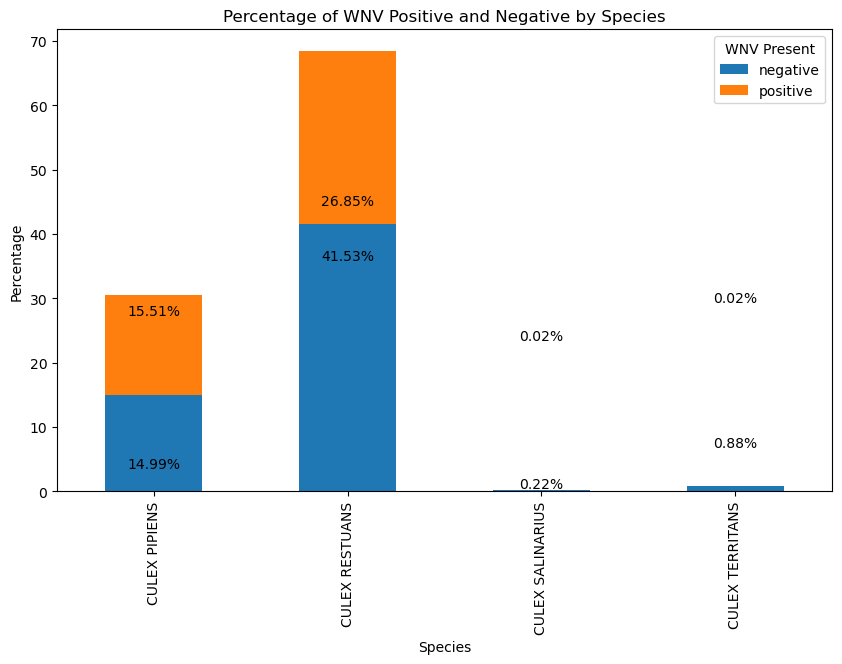

In [47]:
# Calculate the sum of 'Mosquito number' grouped by 'Species' and 'WNV Present'
grouped_sum = df_mosquito.groupby(['Species', 'WNV Present'])['Mosquito number'].sum()

# Calculate the total sum of 'Mosquito number' across all groups
total_sum = grouped_sum.sum()

# Calculate the percentage of each sum
percentages = (grouped_sum / total_sum) * 100

# Unstack the percentages for plotting
stacked_data = percentages.unstack()

# Plotting the stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Percentage of WNV Positive and Negative by Species')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.legend(title='WNV Present', loc='upper right')

# Adding annotations with dynamic spacing
for idx, p in enumerate(ax.patches):
    if p.get_height() > 0:
        height = p.get_height()
        ax.annotate(f"{height:.2f}%", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, -50 + idx * 27), textcoords='offset points')

plt.show()

Note: The comnbined positive and negative WNV Presence in both Species CULEX SALINARIUS and CULEX TERRITANS, each equal less <br>
than one percent of the test mosquitos, so their bars will be to low to fit the percent annotations. However, the percent values will <br>
remain present in the chart and above mirror those of the other two species, in that the top percent value represent the amount of <br>
WVN positive mosquito and the bottom percent value represents the amount of WNV negative mosquitos. 

At first glance, it is easy to conclude we can see that CULEX PIPIENS made up about 30% of the species tests, CULEX RESTUANS made up <br>
about 68.5% of the species test, while CULEX SALINARIUS made up less than 1% and CULEX TERRITANS just over 1% of the species tested. 

Of the species that tested WNV positive, CULEX RESTUANS made up 26.85% of the postive test, CULEX PIPIENS made up 15.51%, CULEX <br>
SALINARIUS and CULEX TERRITANS each made up 0.02%.

However, the this visualization is may be misleading in that it only shows a reliable relationship for WNV testing in CULEX PIPIENS <br>
and CULEX RESTUANS because they made up the majority of the tested population of mosquitos, comprising about 98.5% of the mosquitos <br>
tested. This means there is a strong possibility that the representation of the relationship between WNV presence in species CULEX <br>
SALINARIUS and CULEX TERRITANS is unreliable, due to the significantly disproportionate small amount of  mosquitos tested for WNV <br>
presence.

Nevertheless, in CULEX PIPIENS we a nearly 50/50 split in WNV positve vs negative presence and CULEX RESTUANS appears to have a about <br>
a 1-in-3 chance of a mosquito testing positive for WNV. 

### 2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

In [48]:
# Group by 'Trap type' and count the number of unique values in the 'Trap' column
df_mosquito.groupby('Trap type')['Trap'].nunique()

Trap type
CDC          28
GRAVID      165
OVI           1
SENTINEL     12
Name: Trap, dtype: int64

Here we see the distribution of Trap types used in this study. The distribution Trap types is significantly disproportionate, <br>
which will likely influnce our data and the interpretation of the relationship between mosquitos caught and Trap type. the <br>
GRAVID trap is the most prevenlant and may capture the most mostqutos based on just having a large number of traps. OVI is likely <br>
to significant underperform in captures as there is only one trap of this type in use. CDC traps are more than double the <br>
SENTINEL traps, but since they are the closest in number unlike OVI and GRAVID, we should expect to see CDC and SENTINEL traps to <br>
capture mosquiates in amounts close, if not equal to the disproportion between the maount of CDC and SENTINAL trap used. 

In [49]:
# Group the data by 'Trap type' and sum the 'Mosquito number' in each group
df_mosquito.groupby('Trap type')['Mosquito number'].sum()

Trap type
CDC           9883
GRAVID      186206
OVI              1
SENTINEL      5134
Name: Mosquito number, dtype: int64

Here we see the distribution of mosquitos based on the Trap type they were captured in. As expected the count of captures <br>
is dispreportionate and the proportions are mirror the Trap type accourding to the amount of traps used. 

Let us visualize this and discuss this further, below. Because GRAVID traps captured a significantly higher amount of <br>
mosquito and the OVI trap a significantly smaller amount of mosquitos when compared to other traps, any plots with a <br>
mosquito sum on the y-axis will become very sparce and difficult to analzyse for relatnships/trends. Thus, we will need <br>
to look at the distribution of 'Mosquito Number' across Trap types. 

<Axes: xlabel='Trap type', ylabel='Mosquito number'>

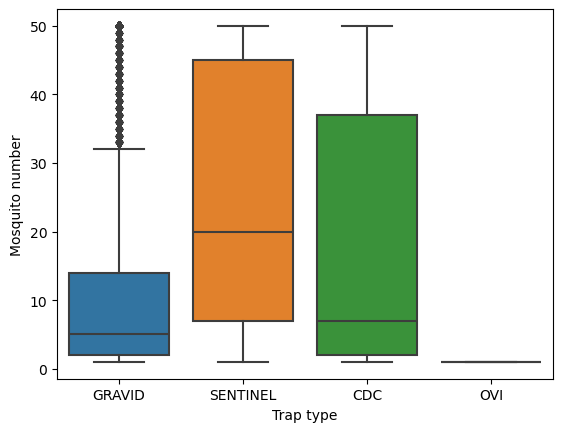

In [50]:
# Group the data by 'Trap type' and sum the 'Mosquito number' in each group
sns.boxplot(x='Trap type', y='Mosquito number', data=df_mosquito)

Based on the box plot above, OVI's visual is as expected as there was only one trap, so we would only see line for that trap type. 

Interestingly, both the SENTINEL and CDC traps have the same wide distribution of their interquartile range, but SENTINALS range is <br>
between Mosquito number 8 and 45, while CDC traps range is lower set, between Mosquito number 3 and 38. Moreover, their medians are <br>
in the lower part of the interquartile range, but SENTINELS median is more than double the median of CDC. This median behavior may be <br>
influenced by the fact that there are almost double the amount of SENTINEL than CDC traps. 

GRAVID traps, being the most abundant trap, does not have an abnormal interquartile range, which is signifanctly lower than SENTINEL <br>
AND CDC. It is also the only trap to show outliers in the plot above. Moreover, these outliers are fairly consistent between Mosquito <br>
number 32 and 50. This distribution in Mosquito number over GRAVID traps, is directly influenced by the artificial cap placed on this <br>
trap type, where when ever this trap exceeded 50 mosquitos, the record was capped at 50 and the difference was put into another row in<br>
the dataset. This capping may have resulted in an increase of Mosquito row-values that we see pulling down the interquartile range of <br>
GRAVID traps. Pulling down the interquartile range can skew the data for this trap such that false-positive outliers will be plotted on <br>
the graph, like we see with the GRAVID trap. This capping may have also affected to SENTINAL AND CDC traps, but it is not as obvious in <br>
this plot. 

All in all if we are to get a better understanding of the relationship between Mosquito number and Trap type, we would need to test <br>
across 
a more even distrbution of Trap types. 

### 3.  Using an appropriate visual, come up with an additional insight of your choice.


Before we visualize the relationship between 'Trap type' and 'Species', let's look at it numerically, as we are now aware that the 'Trap type' distrubution could <br> 
have an impact on what we see. 

In [51]:
# Group the data by 'Trap type' and 'Species', then calculate the sum of 'Mosquito number' in each group
df_mosquito.groupby(['Trap type', 'Species'])['Mosquito number'].sum().unstack()

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
Trap type,,,,
CDC,8988.0,829.0,41.0,25.0
GRAVID,52120.0,131929.0,375.0,1782.0
OVI,1.0,NaN,NaN,NaN
SENTINEL,255.0,4828.0,48.0,3.0


The first thing we will notice here is that there are null values for the OVI trap accross the CULEX RESTUANS, CULEX SALINARIUS and CULEX TERRITANS Species. <br>
This is because the OVI trap only captured one mosquito, which is of the CULEX PIPIENS species. Since there was only one OVI trap used, this is not surprising. <br>
Again we see that GRAVID traps have captured disproportionate amount of mosquitos when compared to other Trap types. However, we now see that the majority of the <br>
mosquitos captured are between the CULEX PIPIENS and CULEX RESTUANS Species. 

Let's visualize this. 

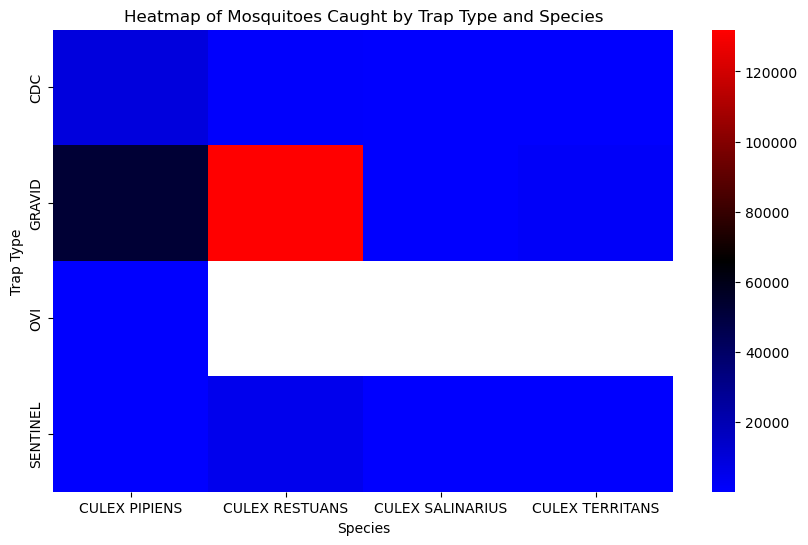

In [52]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# Group the data by 'Trap type' and 'Species', then calculate the sum of 'Mosquito number' in each group
grouped_data = df_mosquito.groupby(['Trap type', 'Species'])['Mosquito number'].sum().unstack()

# Create a custom colormap that transitions from red to black to blue
colors = [(0, 0, 1), (0, 0, 0), (1, 0, 0)]  # Blue, Black, Red
custom_cmap = LinearSegmentedColormap.from_list('CustomMap', colors)

# Plotting the heatmap with custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, cmap=custom_cmap)  # Custom colormap
           
# Adding labels and title
plt.title('Heatmap of Mosquitoes Caught by Trap Type and Species')
plt.xlabel('Species')
plt.ylabel('Trap Type')

plt.show()

Note: The white spaces in the heatmap is due to the OVI trap only capturing one species. 

This visualization is misleading to the extreme disparity between the amount of GRAVID traps versus the rest of the traps. <br>
Becuase the count of CLUEX RESTUANS captured in GRAVID traps is so high, the differences in the amount of species across the <br>
the three Trap types is essential flattened. This flattening is responisble for making the color step-count very small for the <br>
majority of tiles in this heatmap. Just like we saw in the table, the Species CULEX PIPIENS and CULEX RESTUANS were caught the <br>
most by the GRAVID trap as there tile colors are drastically different than any other tiles in the heatmap. Since, the GRAVID <br>
trap is distorting the visualization of the distribution of Species captured by other Trap types, there is only one conclusion <br>
we can drap from this heatmap. That conclusion is that the GRAVID trap has a high success rate of capturing the CULEX PIPIENS <br>
and CULEX RESTUANS Speciies. 
